<a href="https://colab.research.google.com/github/daniellegy/Etapa-1-Analisis/blob/main/Organizardatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

In [2]:
#Importamos las librerías pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [4]:
#Pasar la información a un dataframe
Micro_Retailer=pd.read_excel('microretailer_mit_lift_lab.xlsx')

In [ ]:
#Verificamos información del DataFrame
Micro_Retailer.info()

In [ ]:
#Imprimo los primeros 5 registros del dataframe
Micro_Retailer.head()

In [ ]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(Micro_Retailer)

In [11]:
#Obtengo un análisis univariado de una variable categórica en específico
table1 = freq_tbl(Micro_Retailer['214_customer_relationship_tools'])
table1

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Redes sociales,27,0.157895,0.284211
1,Aplicación móvil,21,0.122807,0.505263
2,Ninguna,20,0.116959,0.715789
3,"Aplicación móvil,Redes sociales",13,0.076023,0.852632
4,Cuaderno,6,0.035088,0.915789
5,Teléfono,1,0.005848,0.926316
6,"Cuaderno,Redes sociales",1,0.005848,0.936842
7,"Aplicación móvil,De frente",1,0.005848,0.947368
8,Físico,1,0.005848,0.957895
9,"Aplicación móvil,Ninguna",1,0.005848,0.968421


In [ ]:
#Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias
table2 = table1.drop(['percentage','cumulative_perc'], axis=1)
table2

In [14]:
#Obtengo un filtro de los valores más relevantes de la variables cateórica seleccionada
Filtro = table2[table2['frequency']>1]
Filtro

,214_customer_relationship_tools,frequency
0,Redes sociales,27
1,Aplicación móvil,21
2,Ninguna,20
3,"Aplicación móvil,Redes sociales",13
4,Cuaderno,6


In [15]:
#Ajuto el indice de mi dataframe
Filtro_index = Filtro.set_index('214_customer_relationship_tools')
Filtro_index

,frequency
214_customer_relationship_tools,
Redes sociales,27
Aplicación móvil,21
Ninguna,20
"Aplicación móvil,Redes sociales",13
Cuaderno,6


Text(0, 0.5, 'Frecuencia')

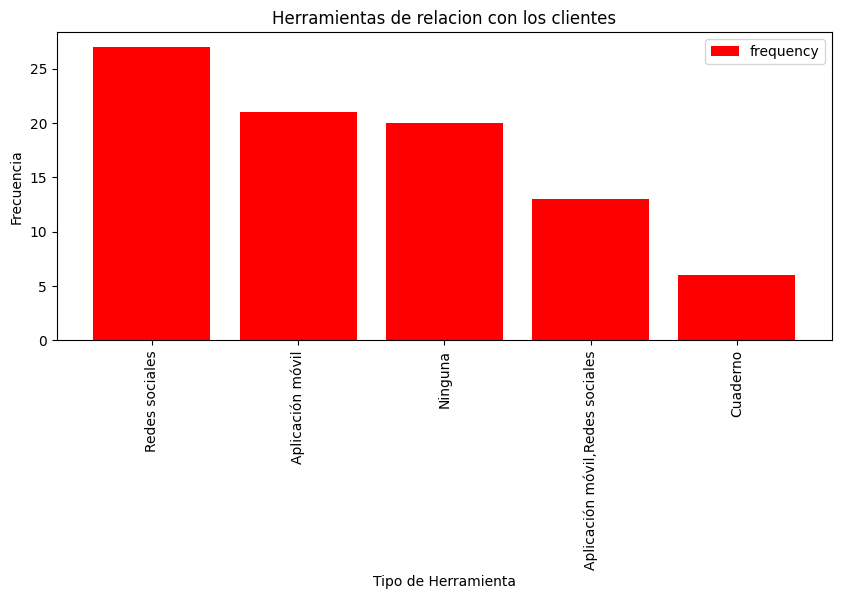

In [18]:
#Realizamos grafico de barras dle dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color='red')
plt.title('Herramientas de relacion con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

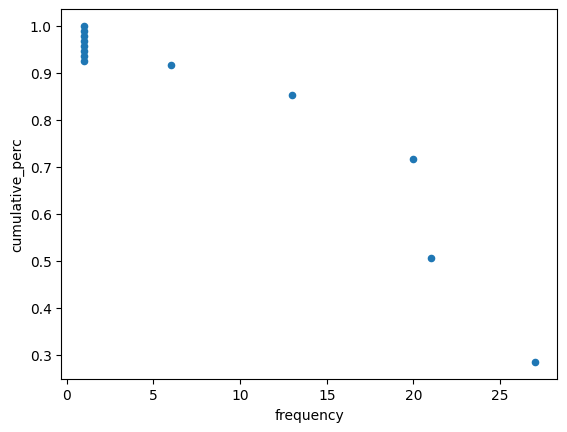

In [19]:
#Realizamos grafico de dispersion del dataframe filtrado
table1.plot("frequency","cumulative_perc", kind="scatter")

<Axes: xlabel='214_customer_relationship_tools'>

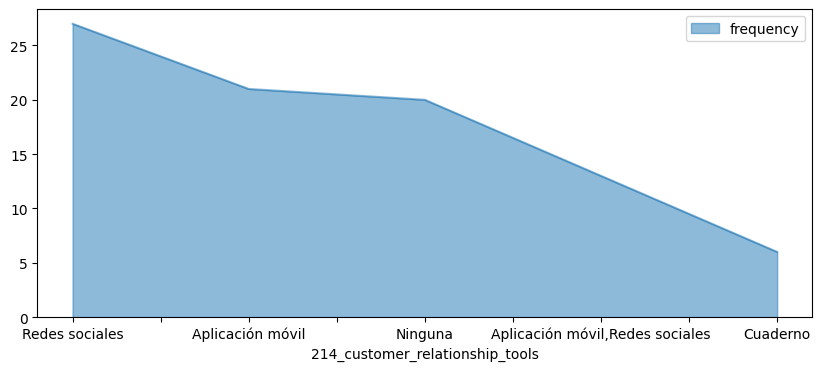

In [20]:
#Realizamos grafio de área del dataframe filtrado
Filtro_index.plot(kind="area",figsize=(10,4), alpha=0.5)

<Axes: ylabel='frequency'>

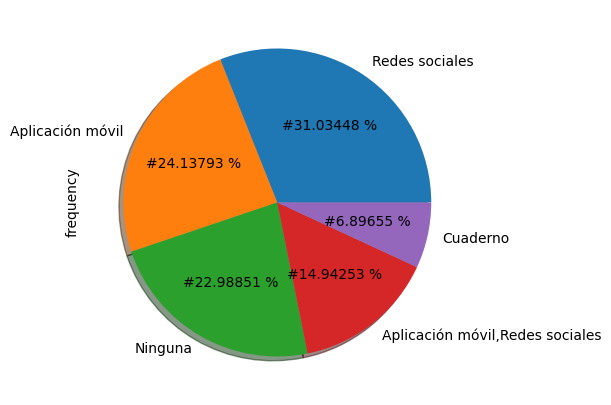

In [22]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True,autopct="#%0.5f %%")

**NÚMERICAS A CATEGÓRICAS**

**DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS**

In [24]:
# Calculamos el número total de la población "n"
Micro_Retailer['_latitude'].info()
n=171

<class 'pandas.core.series.Series'>
RangeIndex: 171 entries, 0 to 170
Series name: _latitude
Non-Null Count  Dtype  
--------------  -----  
171 non-null    float64
dtypes: float64(1)
memory usage: 1.5 KB


In [25]:
#Obtenemos el límite superior y el límite inferior de la columna objetivo
Max=Micro_Retailer['_latitude'].max()
Min=Micro_Retailer['_latitude'].min()
Limites=[Min, Max]
Limites

[18.9993095, 19.0752733]

In [26]:
#Calculamos el rango R
R=Max-Min
R

0.07596380000000025

In [27]:
#Calculamos el número de Intervalos de Clase "ni", aplicamos la regla de Sturges
ni = 1+3.32*np.log10(n)
ni

8.41354708650195

In [28]:
#Calculamos el Ancho del intervalo "i"
i=R/ni
i

0.009028748424296662

**CREACION DE CATEGORIAS A PARTIR DE CLASES**

In [29]:
#Categorización de variables
intervalos=np.linspace(Min, Max, 9)
intervalos

array([18.9993095 , 19.00880498, 19.01830045, 19.02779592, 19.0372914 ,
       19.04678687, 19.05628235, 19.06577782, 19.0752733 ])

In [41]:
#Creamos las categorias
categorias=["Categoría1","Categoría2","Categoría3","Categoría4",
            "Categoría5","Categoría6","Categoría7","Categoría8"]

In [42]:
#Finalmente creamos las categorías en la columna numérica
Micro_Retailer['_latitude']=pd.cut(x= Micro_Retailer['_latitude'], bins=intervalos, labels=categorias)
Micro_Retailer['_latitude']

,_latitude
0,Categoría6
1,Categoría6
2,Categoría7
3,Categoría7
4,Categoría7
...,...
166,Categoría5
167,Categoría5
168,Categoría5
169,Categoría5
